Voici une analyse détaillée de l'intérêt de chaque feature pour prédire la survie dans un cancer du sang :

## **ID (Identifiant patient)**
- **Intérêt direct** : Aucun pour la prédiction (simple identifiant)
- **Utilité** : Essentiel pour l'agrégation des données et le suivi longitudinal
- **Traitement** : À utiliser comme clé de regroupement, pas comme feature prédictive

## **CHR, START, END (Position génomique)** (pas plus important)
- **Intérêt modéré** : Indirect
- **Pourquoi** : Certaines régions chromosomiques sont plus critiques (ex: régions de gènes suppresseurs de tumeurs, oncogènes)
- **Exploitation** : 
  - Peut révéler des "hotspots" mutationnels associés à un mauvais pronostic
  - Utile pour identifier des clusters de mutations
  - Mieux utilisé via des features dérivées (ex: région régulatrice, densité de mutations)

## **REF et ALT (Nucléotides)** ( pas le plus important )
- **Intérêt faible** : Seuls, peu informatifs
- **Pourquoi** : Le type de substitution (transition vs transversion) peut indiquer certains processus mutationnels
- **Exploitation** :
  - Créer des features dérivées : type de mutation (C>T, A>G, etc.)
  - Signature mutationnelle (certains profils sont pronostiques)

## **GENE (Gène affecté)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Critical pour le pronostic
- **Pourquoi** : 
  - Certains gènes sont des **marqueurs pronostiques établis** (ex: TP53, FLT3, NPM1, DNMT3A dans les leucémies)
  - La présence/absence de mutations dans des gènes clés est souvent incluse dans les classifications de risque clinique
- **Exploitation** :
  - One-hot encoding ou embedding des gènes fréquents **(fait encoding spécial)**
  - Créer des features : nombre de gènes mutés **fait** , présence de gènes à haut risque **inclus dans l'encoding**
  - Grouper par voies biologiques **(fait)**

## **PROTEIN_CHANGE (Changement protéique)** ⭐ **IMPORTANT**
- **Intérêt élevé** : Très informatif
- **Pourquoi** :
  - Certaines mutations spécifiques sont des "drivers" connus (ex: FLT3-ITD, JAK2 V617F)
  - La position de la mutation dans la protéine affecte sa sévérité (domaine fonctionnel vs non-fonctionnel)
- **Exploitation** :
  - Identifier les mutations récurrentes ("hotspot mutations")
  - Distinguer les mutations dans des domaines critiques
  - Utiliser des bases de données comme COSMIC pour annoter les mutations connues

## **EFFECT (Catégorie d'effet)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Excellent prédicteur
- **Pourquoi** :
  - Les mutations avec perte de fonction (frameshift, nonsense) ont souvent un impact plus sévère que les missense
  - Permet de stratifier rapidement l'impact fonctionnel
- **Catégories typiques** : 
  - **Haut impact** : frameshift, stop gained/lost, splice site
  - **Moyen** : missense, inframe indels
  - **Faible** : synonymous, UTR
- **Exploitation** :
  - Feature catégorielle directe
  - Créer des scores agrégés : proportion de mutations à haut impact par patient

## **VAF (Variant Allele Fraction)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Potentiellement le plus prédictif
- **Pourquoi** :
  - **Charge tumorale** : VAF élevé = proportion importante de cellules mutées = tumeur plus agressive ou plus avancée
  - **Clonalité** : VAF élevé suggère une mutation "fondatrice" (précoce, présente dans toutes les cellules tumorales)
  - **Hétérogénéité** : Distribution des VAF indique la complexité clonale (mauvais pronostic si élevée)
- **Exploitation** :
  - VAF moyen/médian par patient
  - VAF max (mutation dominante)
  - Nombre de mutations avec VAF > seuil (ex: 0.3, 0.5)
  - Distribution/variance des VAF (hétérogénéité)
  - VAF pondéré par l'importance du gène

---

## **Features dérivées recommandées**

Pour maximiser la performance de votre modèle ML, créez ces features agrégées **par patient** :

1. **Charge mutationnelle**
   - Nombre total de mutations somatiques
   - Nombre de mutations à haut impact

2. **Profil génétique**
   - Présence/absence de gènes pronostiques connus
   - Score de risque génétique composite

3. **Métriques de VAF**
   - VAF moyen, médian, max
   - Écart-type des VAF (hétérogénéité)
   - Nombre de mutations avec VAF > 0.4 (mutations clonales)

4. **Complexité tumorale**
   - Nombre de voies biologiques affectées
   - Diversité des effets (entropie des catégories EFFECT)

5. **Interactions génétiques**
   - Co-occurrence de mutations (certaines combinaisons sont synergiques)

Ces données génomiques sont extrêmement riches pour la prédiction de survie dans les cancers hématologiques !

Voici une analyse détaillée de l'intérêt de chaque feature clinique pour prédire la survie :

## **ID (Identifiant patient)**
- **Intérêt** : Aucun (clé de jointure avec les données moléculaires)

## **CENTER (Centre clinique)** 
- **Intérêt modéré** : Potentiellement informatif
- **Pourquoi** :
  - **Qualité des soins** : Variations entre centres (expertise, protocoles)
  - **Biais de sélection** : Certains centres peuvent recruter des cas plus complexes
  - **Facteurs socio-économiques** : Accès aux traitements, suivi
- **Exploitation** :
  - Encoding catégoriel ou groupement par taille/expertise
  - Peut servir de variable de stratification
- **Attention** : Risque de sur-apprentissage si peu de patients par centre

## **BM_BLAST (Blastes médullaires en %)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Un des marqueurs pronostiques les plus puissants
- **Pourquoi** :
  - **Critère diagnostique** : Définit le type et le stade de la maladie (ex: MDS vs AML si >20%)
  - **Charge tumorale** : % élevé = maladie plus agressive
  - **Classification WHO** : Seuils pronostiques établis (5%, 10%, 20%)
  - Corrélé directement à la survie : plus le % est élevé, pire le pronostic
- **Exploitation** :
  - Feature continue très prédictive
  - Créer des catégories selon classifications cliniques
  - Interaction avec cytogénétique (blast + mauvaise cyto = très mauvais pronostic)

## **WBC (Globules blancs en G/L)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Marqueur pronostique établi
- **Pourquoi** :
  - **WBC élevé** (>20-30 G/L) = souvent mauvais pronostic dans les leucémies
  - Reflète la **prolifération tumorale**
  - **Leucocytose** peut indiquer une maladie agressive (ex: leucémie myélomonocytaire chronique)
  - Risque de complications (leucostase, syndrome de lyse tumorale)
- **Exploitation** :
  - Feature continue
  - Transformation log possible (distribution souvent asymétrique)
  - Seuils cliniques : <4, 4-10, 10-30, >30 G/L

## **ANC (Neutrophiles absolus en G/L)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Indicateur de fonction médullaire
- **Pourquoi** :
  - **Neutropénie** (<1.5 G/L) = risque infectieux, réserve médullaire faible
  - Reflète la capacité de la moelle à produire des cellules normales
  - ANC bas = moelle "envahie" par les cellules tumorales
  - **Pronostic** : ANC bas corrélé à survie réduite
- **Exploitation** :
  - Feature continue
  - Catégories cliniques : sévère (<0.5), modérée (0.5-1.0), normale (>1.5)

## **MONOCYTES (Monocytes en G/L)** ⭐ **IMPORTANT** (absent dans le test donc drop)
- **Intérêt élevé** : Spécifique selon le type de cancer
- **Pourquoi** :
  - **Monocytose** (>1 G/L) : critère diagnostique de certains cancers (LMMC = leucémie myélomonocytaire chronique)
  - Marqueur de sous-type de maladie
  - Peut indiquer une différenciation monocytaire anormale
- **Exploitation** :
  - Feature continue
  - Ratio monocytes/lymphocytes (si lymphocytes disponibles)
  - Seuil à 1 G/L pour monocytose

## **HB (Hémoglobine en g/dL)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Marqueur de sévérité
- **Pourquoi** :
  - **Anémie** = symptôme clé des cancers du sang (insuffisance médullaire)
  - HB bas (<10 g/dL) = mauvais pronostic établi
  - Reflète la capacité de production érythrocytaire
  - Impact sur qualité de vie et performance status
  - Critère majeur dans les scores pronostiques (IPSS, IPSS-R)
- **Exploitation** :
  - Feature continue très prédictive
  - Catégories WHO : sévère (<8), modérée (8-10), légère (10-12)
  - Dépendance aux transfusions (si HB très bas)

## **PLT (Plaquettes en G/L)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Un des plus puissants prédicteurs
- **Pourquoi** :
  - **Thrombopénie** (<100 G/L) = marqueur pronostique majeur
  - PLT bas = insuffisance médullaire sévère, risque hémorragique
  - **Sévérité** : PLT <50 = mauvais, PLT <20 = très mauvais pronostic
  - Critère central dans tous les scores pronostiques (IPSS, WPSS, IPSS-R)
  - Reflète la fonction mégacaryocytaire
- **Exploitation** :
  - Feature continue extrêmement prédictive
  - Catégories : sévère (<50), modérée (50-100), normale (>150)
  - Transformation log possible

## **CYTOGENETICS (Caryotype)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : LE facteur pronostique le plus puissant dans beaucoup de cancers du sang
- **Pourquoi** :
  - **Classification de risque** : Base des scores pronostiques (IPSS-R)
  - Certaines anomalies sont **très défavorables** : -7/del(7q), -5/del(5q), caryotype complexe (≥3 anomalies), anomalies chromosome 3
  - Certaines sont **favorables** : del(5q) isolée, del(20q), -Y
  - **Caryotype complexe** (≥3 anomalies) = très mauvais pronostic
  - **Caryotype normal** vs **anormal** = différence pronostique majeure
- **Exploitation** :
  - **Parsing ISCN** : Complexe mais essentiel !
    - Identifier : nombre de chromosomes (46 = normal, autres = aneuploidie)
    - Détecter délétions (del, -), additions (+), translocations t()
    - Compter nombre d'anomalies (complexité)
  - **Features à créer** :
    - **Catégorie de risque cytogénétique** : Très bon / Bon / Intermédiaire / Mauvais / Très mauvais (selon classification IPSS-R)
    - Présence d'anomalies spécifiques : -7, del(5q), -5, anomalie 3, etc.
    - **Complexité** : nombre d'anomalies (0, 1, 2, 3+)
    - Caryotype normal (46,XX ou 46,XY) vs anormal
    - Monosomies/trisomies
- **Exemples de classification** :
  - **Très favorable** : -Y isolé, del(11q) isolé
  - **Favorable** : Normal, del(5q) isolé, del(12p) isolé, del(20q) isolé, double incluant del(5q)
  - **Intermédiaire** : del(7q) isolé, +8 isolé, +19 isolé, i(17q) isolé, autres simples/doubles
  - **Défavorable** : -7, inv(3)/t(3q), double incluant -7/del(7q), caryotype complexe (3 anomalies)
  - **Très défavorable** : Caryotype complexe (>3 anomalies)

---

## **Features dérivées recommandées**

### 1. **Scores pronostiques établis** (à recréer)
- **IPSS-R** (International Prognostic Scoring System - Revised) :
  - Combine : BM_BLAST, cytogénétique, HB, PLT, ANC
  - Classification : Très bas / Bas / Intermédiaire / Élevé / Très élevé risque
- **WPSS** (WHO Prognostic Scoring System)

### 2. **Ratios et interactions**
- WBC/ANC (proportion de cellules anormales)
- PLT/HB (sévérité de l'atteinte médullaire)
- BM_BLAST × complexité cytogénétique
- Charge tumorale composite : (BM_BLAST + WBC_log) × risque_cyto

### 3. **Sévérité globale**
- Nombre de cytopénies (HB bas + PLT bas + ANC bas)
- Score composite d'insuffisance médullaire

### 4. **Catégorisation cytogénétique**
- **Essentiel** : Parser le caryotype pour extraire :
  - Risque cytogénétique (selon IPSS-R)
  - Nombre d'anomalies
  - Présence d'anomalies à haut risque (-7, -5, complexe)

---

## **Priorités pour le ML**

**Top 3 features les plus prédictives** :
1. **CYTOGENETICS** (une fois parsé et catégorisé)
2. **BM_BLAST**
3. **PLT**

Ces trois features constituent la base des scores pronostiques cliniques validés et sont probablement les plus importants pour votre modèle.

**Attention** : La cytogénétique nécessite un travail de preprocessing substantiel (parsing ISCN, classification de risque) mais c'est un investissement crucial pour la performance du modèle !

In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sksurv.util import Surv

In [48]:
from ens_data_challenge.globals import TRAIN_CLINICAL_DATA_PATH, TRAIN_MOLECULAR_DATA_PATH, TRAIN_TARGET_PATH, TEST_CLINICAL_DATA_PATH, TEST_MOLECULAR_DATA_PATH
df = pd.read_csv(TRAIN_CLINICAL_DATA_PATH)
df_eval = pd.read_csv(TEST_CLINICAL_DATA_PATH)

# Molecular Data
maf_df = pd.read_csv(TRAIN_MOLECULAR_DATA_PATH)
maf_eval = pd.read_csv(TEST_MOLECULAR_DATA_PATH)

target_df = pd.read_csv(TRAIN_TARGET_PATH)

# Preview the data
df.head()

,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS
0,P132697,MSK,14.0,2.8,0.2,0.7,7.6,119.0,"46,xy,del(20)(q12)[2]/46,xy[18]"
1,P132698,MSK,1.0,7.4,2.4,0.1,11.6,42.0,"46,xx"
2,P116889,MSK,15.0,3.7,2.1,0.1,14.2,81.0,"46,xy,t(3;3)(q25;q27)[8]/46,xy[12]"
3,P132699,MSK,1.0,3.9,1.9,0.1,8.9,77.0,"46,xy,del(3)(q26q27)[15]/46,xy[5]"
4,P132700,MSK,6.0,128.0,9.7,0.9,11.1,195.0,"46,xx,t(3;9)(p13;q22)[10]/46,xx[10]"


In [49]:
from ens_data_challenge.preprocess.preprocessor import Preprocessor

preprocessor = Preprocessor()

In [50]:
cyto_struct, cyto_struct_val = preprocessor.fit(
    molecular_data_test=maf_eval, 
    clinical_data_test=df_eval, 
    molecular_data_train=maf_df, 
    clinical_data_train=df
)

preprocessor

,cat_thresh,0.01


In [51]:
clinical_data_clean, molecular_data_clean, cyto_struct_clean, targets_clean = preprocessor.transform(
    df,
    maf_df,
    cyto_struct,
    target_df
)

In [52]:
clinical_data_clean_val, molecular_data_clean_val, cyto_struct_clean_val = preprocessor.transform(
    df_eval,
    maf_eval,
    cyto_struct_val,
)

In [53]:
molecular_data_clean

,ID,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,EFFECT,VAF,DEPTH
0,P100000,11,119149248.0,119149248.0,G,A,CBL,p.C419Y,non_synonymous_codon,0.08300,1308.0
1,P100000,5,131822301.0,131822301.0,G,T,IRF1,p.Y164*,stop_gained,0.02200,532.0
2,P100000,3,77694060.0,77694060.0,G,C,OTHER,p.?,OTHER,0.41000,876.0
3,P100000,4,106164917.0,106164917.0,G,T,TET2,p.R1262L,non_synonymous_codon,0.43000,826.0
4,P100000,2,25468147.0,25468163.0,OTHER,A,DNMT3A,p.E505fs*141,frameshift_variant,0.08980,942.0
...,...,...,...,...,...,...,...,...,...,...,...
10540,P131472,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0
10541,P131505,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0
10542,P131816,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0
10543,P132717,OTHER,0.0,0.0,OTHER,OTHER,MLL,MLL_PTD,PTD,0.32125,975.0


In [54]:
clinical_data_clean

,ID,CENTER,BM_BLAST,WBC,ANC,HB,PLT,is_normal,has_tp53_deletion,has_complex_chr3,...,n_critical_regions_deleted,has_large_deletion,is_mosaic,n_clones,abnormal_clone_percentage,computed_risk_score,mds_ipss_r_cyto_risk,aml_eln_2022_cyto_risk,cll_cyto_risk,mm_riss_cyto_risk
0,P132697,MSK,14.0,2.80,0.20,7.6,119.0,False,False,False,...,0.0,False,True,2.0,10.0,0.185,low,intermediate,intermediate,intermediate
1,P132698,MSK,1.0,7.40,2.40,11.6,42.0,True,False,False,...,0.0,False,False,1.0,0.0,0.000,low,intermediate,very low,intermediate
2,P116889,MSK,15.0,3.70,2.10,14.2,81.0,False,False,True,...,0.0,False,True,2.0,40.0,0.336,high,very high,intermediate,intermediate
3,P132699,MSK,1.0,3.90,1.90,8.9,77.0,False,False,False,...,0.0,False,True,2.0,75.0,0.185,intermediate,intermediate,intermediate,intermediate
4,P132700,MSK,6.0,128.00,9.70,11.1,195.0,False,False,False,...,0.0,False,True,2.0,50.0,0.185,intermediate,very high,intermediate,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,P121826,VU,1.0,2.50,1.02,10.2,78.0,True,False,False,...,0.0,False,False,1.0,0.0,0.000,low,intermediate,very low,intermediate
3169,P121827,VU,1.5,8.10,2.66,11.3,40.0,False,False,False,...,1.0,True,False,1.0,100.0,0.520,very high,very high,intermediate,intermediate
3170,P121830,VU,0.0,1.80,0.55,9.4,86.0,False,False,False,...,0.0,False,True,2.0,80.0,0.382,high,very high,intermediate,intermediate
3171,P121853,VU,5.0,1.37,0.37,11.4,102.0,False,False,False,...,0.0,False,True,4.0,25.0,0.185,intermediate,intermediate,intermediate,intermediate


In [55]:
cyto_struct_clean

,ID,ploidy,sex_chromosomes,clone_index,clone_cell_count,mutation_type,chromosome,arm,start,end,start_arm,end_arm,raw
0,P132697,46.0,XY,0,2,deletion,20,q,12,0,q,UNKNOWN,"{'type': 'deletion', 'chromosome': '20', 'arm'..."
1,P116889,46.0,XY,0,8,translocation,"3,3",UNKNOWN,0,0,q,q,"{'type': 'translocation', 'chromosomes': ('3',..."
2,P132699,46.0,XY,0,15,deletion,3,q,26,27,q,q,"{'type': 'deletion', 'chromosome': '3', 'arm':..."
3,P132700,46.0,XX,0,10,translocation,"3,9",UNKNOWN,0,0,p,q,"{'type': 'translocation', 'chromosomes': ('3',..."
4,P132704,45.0,XX,0,2,deletion,5,q,13,33,q,q,"{'type': 'deletion', 'chromosome': '5', 'arm':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,P121830,46.0,XY,0,4,deletion,20,q,11.2,13.1,q,q,"{'type': 'deletion', 'chromosome': '20', 'arm'..."
2754,P121830,46.0,XY,1,16,monosomy,7,UNKNOWN,0,0,UNKNOWN,UNKNOWN,7
2755,P121853,46.0,XX,0,5,deletion,1,p,34,0,p,UNKNOWN,"{'type': 'deletion', 'chromosome': '1', 'arm':..."
2756,P121853,46.0,XX,1,12,monosomy,18,UNKNOWN,0,0,UNKNOWN,UNKNOWN,18


In [56]:
from ens_data_challenge.feature_engineering.feat_engineer import FeatureEngineer2
from ens_data_challenge.types import CytoColumns, MolecularColumns, CytoStructColumns

fe = FeatureEngineer2(
    clinical_data_train=clinical_data_clean,
    clinical_data_test=clinical_data_clean_val,
    molecular_data_train=molecular_data_clean,
    molecular_data_test=molecular_data_clean_val,
    cytogenetic_data_train=cyto_struct_clean,
    cytogenetic_data_test=cyto_struct_clean_val,
    target_data_train=target_df
    )

In [57]:

clin_cat_features = fe.as_type(
    type_dict={
        CytoColumns.IS_NORMAL.value: 'int32',
        # CytoColumns.HAS_TP53_DELETION.value: 'int32',
        CytoColumns.HAS_COMPLEX_CHR3.value: 'int32',
        # CytoColumns.HAS_LARGE_DELETION.value: 'int32',
    },
    data_type='clinical'
)


In [58]:

gene_features = fe.add_mol_encoding(
    col='GENE',
    method='vaf_score',
    apply_effect_weighting=False
)

pathway_features = fe.add_mol_encoding(
    col='PATHWAY',
    method='vaf_score',
    apply_effect_weighting=False
)

chr_features = fe.add_mol_encoding(
    col='CHR',
    method='constant',
    apply_effect_weighting=False
)

# fe.add_mol_encoding(
#     col='EFFECT',
#     method='constant',
#     apply_effect_weighting=False
# )


Ajoutées 65 colonnes encodées pour 'GENE' (method=vaf_score, apply_effect_weighting=False).
Ajoutées 8 colonnes encodées pour 'PATHWAY' (method=vaf_score, apply_effect_weighting=False).
Ajoutées 23 colonnes encodées pour 'CHR' (method=constant, apply_effect_weighting=False).


In [59]:

mol_cat_features = fe.one_hot_encode(
    categorical_cols=[
        MolecularColumns.EFFECT.value,
        MolecularColumns.GENE.value,
        MolecularColumns.REF.value,
        MolecularColumns.ALT.value,
        MolecularColumns.CHR.value
    ],
    data_type='molecular'
)

cyto_cat_features = fe.one_hot_encode(
    categorical_cols=[
        CytoStructColumns.MUTATION_TYPE.value,
        CytoStructColumns.ARM.value,
        CytoStructColumns.SEX_CHROMOSOMES.value,
        CytoStructColumns.END_ARM.value,
        CytoStructColumns.START_ARM.value,
    ],
    data_type='cytogenetic'
)


145 new features added to molecular data.
20 new features added to cytogenetic data.


In [60]:

risk_features = fe.encode_risk(
    categorical_cols=[
        CytoColumns.MDS_IPSS_R_CYTO_RISK.value,
        CytoColumns.AML_ELN_2022_CYTO_RISK.value,
        CytoColumns.CLL_CYTO_RISK.value,
        CytoColumns.MM_RISS_CYTO_RISK.value,
    ],
    data_type='clinical'
)

risk_features += [CytoColumns.COMPUTED_RISK_SCORE.value]

In [61]:
Nmut = fe.Nmut()
severity = fe.severity_scores()
random = fe.random(seed=42)

In [62]:
clinical_train_processed, clinical_val_processed = fe.get_clinical_data()
molecular_train_processed, molecular_val_processed = fe.get_molecular_data()
cytogenetic_train_processed, cytogenetic_val_processed = fe.get_cytogenetic_data()

In [63]:
clinical_train_processed

,BM_BLAST,WBC,ANC,HB,PLT,is_normal,has_complex_chr3,n_abnormalities,n_chromosomes_affected,n_deletions,...,6__constant,7__constant,8__constant,9__constant,X__constant,OTHER__constant,Nmut,cytopenias_count,random_feature,ID
0,14.0,2.80,0.20,7.6,119.0,0,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2,0.304717,P132697
1,1.0,7.40,2.40,11.6,42.0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,-1.039984,P132698
2,15.0,3.70,2.10,14.2,81.0,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1,0.750451,P116889
3,1.0,3.90,1.90,8.9,77.0,0,0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,3.0,0.0,11.0,2,0.940565,P132699
4,6.0,128.00,9.70,11.1,195.0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1.951035,P132700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,1.0,2.50,1.02,10.2,78.0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2,-0.917709,P121826
3169,1.5,8.10,2.66,11.3,40.0,0,0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,-1.188389,P121827
3170,0.0,1.80,0.55,9.4,86.0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,6.0,3,1.064209,P121830
3171,5.0,1.37,0.37,11.4,102.0,0,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,0.688612,P121853


In [64]:
final_molecular_train_processed = molecular_train_processed.groupby('ID').mean(numeric_only=True)

In [65]:
final_molecular_train_processed.drop(columns=["START", "END", "DEPTH", ])

,VAF,EFFECT_OTHER,EFFECT_PTD,EFFECT_frameshift_variant,EFFECT_inframe_codon_gain,EFFECT_inframe_codon_loss,EFFECT_non_synonymous_codon,EFFECT_stop_gained,EFFECT_stop_lost,GENE_ASXL1,...,CHR_22,CHR_3,CHR_4,CHR_5,CHR_6,CHR_7,CHR_8,CHR_9,CHR_OTHER,CHR_X
ID,,,,,,,,,,,,,,,,,,,,,
P100000,0.301300,0.166667,0.0,0.166667,0.0,0.0,0.50,0.166667,0.0,0.00,...,0.0,0.166667,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
P100001,0.259500,0.000000,0.0,0.000000,0.0,0.0,0.50,0.500000,0.0,0.00,...,0.5,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
P100002,0.397000,0.000000,0.0,0.000000,0.0,0.0,0.50,0.500000,0.0,0.00,...,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
P100004,0.469100,0.000000,0.0,1.000000,0.0,0.0,0.00,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
P100006,0.169300,0.000000,0.0,0.200000,0.0,0.0,0.60,0.200000,0.0,0.00,...,0.2,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P132725,0.533600,0.000000,0.0,0.200000,0.0,0.0,0.60,0.200000,0.0,0.20,...,0.0,0.200000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.2
P132726,0.269000,0.000000,0.0,0.000000,0.0,0.0,0.00,1.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
P132727,0.322250,0.000000,0.0,0.500000,0.0,0.0,0.00,0.500000,0.0,0.50,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
final_cytogenetic_train_processed = cytogenetic_train_processed.groupby('ID').mean(numeric_only=True)

In [67]:
final_cytogenetic_train_processed

,clone_index,clone_cell_count,mutation_type_deletion,mutation_type_derivative,mutation_type_duplication,mutation_type_inversion,mutation_type_isochromosome,mutation_type_marker,mutation_type_monosomy,mutation_type_translocation,...,arm_p,arm_q,sex_chromosomes_X,sex_chromosomes_XX,sex_chromosomes_XXX,sex_chromosomes_XY,end_arm_p,end_arm_q,start_arm_p,start_arm_q
ID,,,,,,,,,,,,,,,,,,,,,
P100000,0.0,3.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,1.000000,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000
P100001,0.5,3.5,0.500000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.500000,0.0,1.0,0.0,0.0,0.000000,0.500000,0.000000,0.500000
P100002,0.0,0.0,0.285714,0.285714,0.0,0.0,0.0,0.0,0.142857,0.285714,...,0.142857,0.142857,0.0,1.0,0.0,0.0,0.142857,0.285714,0.285714,0.285714
P100007,0.0,20.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,1.000000,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000
P100010,0.0,0.0,0.200000,0.000000,0.0,0.0,0.0,0.2,0.600000,0.000000,...,0.000000,0.200000,0.0,1.0,0.0,0.0,0.000000,0.200000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P132714,0.0,19.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
P132715,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
P132720,0.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.5,0.500000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000


In [68]:
base_features = ['BM_BLAST', 'HB', 'PLT', 'WBC', 'ANC']

In [69]:
clin_features = base_features + Nmut + severity + risk_features + clin_cat_features + random  + pathway_features + gene_features

#gene_features + pathway_features + chr_features

In [70]:
cyto_features = final_cytogenetic_train_processed.columns.tolist()
cyto_features.remove('clone_cell_count')
cyto_features.remove('clone_index')

In [71]:
mol_features = final_molecular_train_processed.columns.tolist()
mol_features.remove('START')
mol_features.remove('END')
mol_features.remove('DEPTH')

In [72]:
features = clin_features + mol_features + cyto_features

In [73]:
X_clin = clinical_train_processed.copy()
X_clin_mol = pd.merge(X_clin, final_molecular_train_processed.copy(), on='ID', how='outer')
X = pd.merge(X_clin_mol, final_cytogenetic_train_processed.copy(), on='ID', how='outer')
X.fillna(0, inplace=True)

In [74]:
X

,BM_BLAST,WBC,ANC,HB,PLT,is_normal,has_complex_chr3,n_abnormalities,n_chromosomes_affected,n_deletions,...,arm_p,arm_q,sex_chromosomes_X,sex_chromosomes_XX,sex_chromosomes_XXX,sex_chromosomes_XY,end_arm_p,end_arm_q,start_arm_p,start_arm_q
0,3.0,7.50,4.65,8.8,406.0,0,0,1.0,1.0,1.0,...,0.000000,1.000000,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000
1,2.0,7.21,2.88,9.8,364.0,0,0,1.0,1.0,1.0,...,0.000000,0.500000,0.0,1.0,0.0,0.0,0.000000,0.500000,0.000000,0.500000
2,15.0,2.60,0.49,8.9,35.0,0,0,7.0,5.0,2.0,...,0.142857,0.142857,0.0,1.0,0.0,0.0,0.142857,0.285714,0.285714,0.285714
3,3.0,2.55,1.56,7.0,708.0,1,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,2.0,2.31,1.25,11.8,141.0,1,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,12.0,2.00,0.60,11.5,61.0,1,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3169,15.0,1.90,0.50,11.2,383.0,1,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3170,5.0,2.30,1.00,11.3,44.0,1,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3171,2.0,44.90,40.10,8.2,14.0,0,0,1.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000


In [75]:
X["ID"]

0       P100000
1       P100001
2       P100002
3       P100004
4       P100005
         ...   
3168    P132725
3169    P132726
3170    P132727
3171    P132728
3172    P132729
Name: ID, Length: 3173, dtype: object

In [76]:
X_clin["ID"]

0       P132697
1       P132698
2       P116889
3       P132699
4       P132700
         ...   
3168    P121826
3169    P121827
3170    P121830
3171    P121853
3172    P121834
Name: ID, Length: 3173, dtype: object

In [77]:
targets_clean["ID"]

0       P132697
1       P132698
2       P116889
3       P132699
4       P132700
         ...   
3168    P121826
3169    P121827
3170    P121830
3171    P121853
3172    P121834
Name: ID, Length: 3173, dtype: object

In [78]:
# Aligner X et targets_clean par ID pour éviter les décalages
common_ids = set(targets_clean['ID']) & set(X['ID'])
X = X[X['ID'].isin(common_ids)].sort_values('ID').reset_index(drop=True)
X = X[features]
targets_clean = targets_clean[targets_clean['ID'].isin(common_ids)].sort_values('ID').reset_index(drop=True)

# Recréer la target alignée
y = Surv.from_arrays(
    event=targets_clean["OS_STATUS"].astype(bool),
    time=targets_clean["OS_YEARS"]
)

In [ ]:
# --- Création de X_eval (Données de test) ---

# 1. Agrégation des données moléculaires et cytogénétiques de validation
final_molecular_val_processed = molecular_val_processed.groupby('ID').mean(numeric_only=True)
final_cytogenetic_val_processed = cytogenetic_val_processed.groupby('ID').mean(numeric_only=True)

# 2. Fusion avec les données cliniques
X_clin_eval = clinical_val_processed.copy()
X_clin_mol_eval = pd.merge(X_clin_eval, final_molecular_val_processed.copy(), on='ID', how='outer')
X_eval = pd.merge(X_clin_mol_eval, final_cytogenetic_val_processed.copy(), on='ID', how='outer')

# 3. Remplissage des valeurs manquantes
X_eval.fillna(0, inplace=True)

# --- Alignement avec df_eval ---
# On s'assure que X_eval suit exactement l'ordre de df_eval pour la soumission
X_eval = pd.merge(df_eval[['ID']], X_eval, on='ID', how='left')

# 4. Alignement des features avec X (Train)
# On utilise les colonnes de X pour être sûr d'avoir exactement les mêmes features
final_features = X.columns.tolist()

# Ajout des colonnes manquantes (ex: catégories présentes dans train mais pas dans test)
for col in final_features:
    if col not in X_eval.columns:
        X_eval[col] = 0

# Sélection stricte des mêmes colonnes que X
X_eval = X_eval[final_features]

# Vérification
print(f"X_eval shape: {X_eval.shape}")
# Vérifier l'ordre des colonnes
assert X_eval.columns.tolist() == X.columns.tolist(), "Les colonnes de X et X_eval ne correspondent pas !"

X_eval shape: (1193, 254)


In [80]:
# ajouter de la PCA sur les données moléculaires et cytogénétiques

In [81]:
# K-fold CV — perf train + val pour Coxnet
from sklearn.model_selection import KFold
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_ipcw
from sklearn.preprocessing import StandardScaler

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scaler = StandardScaler()

# stocker per-fold
coxnet_train_scores = []
coxnet_val_scores = []
coxnet_importances = []
test_predictions = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}/{n_splits}")
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    # # Normaliser les features
    # X_tr_scaled = scaler.fit_transform(X_tr)
    # X_val_scaled = scaler.transform(X_val)
    
    # ---- Coxnet (Cox avec régularisation L1/L2) ----
    coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.6, normalize=False)
    coxnet.fit(X_tr, y_tr)
    
    # prédictions
    coxnet_scores_tr = coxnet.predict(X_tr)
    coxnet_scores_val = coxnet.predict(X_val)

    # c-index IPCW (on train use y_tr for both args)
    coxnet_c_tr = concordance_index_ipcw(y_tr, y_tr, coxnet_scores_tr, tau=7)[0]
    coxnet_c_val = concordance_index_ipcw(y_tr, y_val, coxnet_scores_val, tau=7)[0]
    print(f"  Coxnet -> train C-index IPCW: {coxnet_c_tr * 100 :.4f} | val C-index IPCW: {coxnet_c_val * 100:.4f}")

    coxnet_train_scores.append(coxnet_c_tr)
    coxnet_val_scores.append(coxnet_c_val)

Fold 1/5
  Coxnet -> train C-index IPCW: 73.0006 | val C-index IPCW: 69.9376
Fold 2/5
  Coxnet -> train C-index IPCW: 71.8910 | val C-index IPCW: 74.0203
Fold 3/5
  Coxnet -> train C-index IPCW: 72.8158 | val C-index IPCW: 70.5573
Fold 4/5
  Coxnet -> train C-index IPCW: 72.5848 | val C-index IPCW: 71.2914
Fold 5/5
  Coxnet -> train C-index IPCW: 72.3434 | val C-index IPCW: 72.5728



--- Résumé Coxnet ---
Coxnet — train: 72.5271 ± 0.3871
Coxnet — val  : 71.6759 ± 1.4643

--- Feature Importances (Coxnet coefficients) ---
                                               Feature  Importance
43                                     TP53__vaf_score    0.879363
87                                      MLL__vaf_score    0.376011
155                                          GENE_TET2    0.341579
218                                             CHR_17    0.318072
10                                   mm_riss_cyto_risk    0.305499
22   Suppresseurs de tumeurs / Réparation de l'ADN_...    0.304606
223                                             CHR_21    0.302270
88                                                 VAF    0.290560
55                                    SF3B1__vaf_score    0.246498
15            Signalisation / Prolifération__vaf_score    0.229826
57                                    ASXL1__vaf_score    0.202698
7                                 mds_ipss_r_cyto_risk  

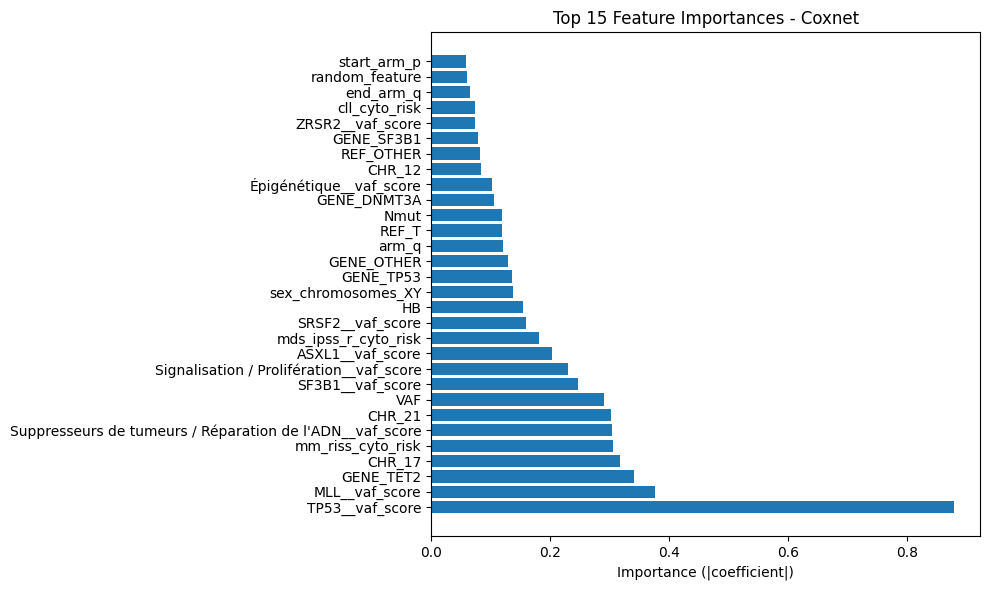

In [82]:
# Résumé Coxnet + Feature Importances
print("\n--- Résumé Coxnet ---")
coxnet_tr_mean = np.nanmean(coxnet_train_scores)
coxnet_tr_std  = np.nanstd(coxnet_train_scores, ddof=0)
coxnet_val_mean = np.nanmean(coxnet_val_scores)
coxnet_val_std  = np.nanstd(coxnet_val_scores, ddof=0)

print(f"Coxnet — train: {coxnet_tr_mean * 100:.4f} ± {coxnet_tr_std* 100:.4f}")
print(f"Coxnet — val  : {coxnet_val_mean * 100:.4f} ± {coxnet_val_std * 100:.4f}")

# Feature Importances (coefficients du dernier fold)
print("\n--- Feature Importances (Coxnet coefficients) ---")
feature_importances = np.abs(coxnet.coef_[:, -1])
feature_names = X.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

nb_features = 30

print(importances_df.head(nb_features))

# Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'].head(nb_features), importances_df['Importance'].head(nb_features))
plt.xlabel('Importance (|coefficient|)')
plt.title('Top 15 Feature Importances - Coxnet')
plt.tight_layout()
plt.show()

In [83]:
# Filtrer les features plus importantes que les random
random_importances = importances_df[importances_df['Feature'].str.startswith('random_')]['Importance']
max_random_importance = random_importances.max()

selected_features = importances_df[importances_df['Importance'] > max_random_importance]['Feature'].tolist()

print(f"\n--- Features sélectionnées ({len(selected_features)}) ---")
print(selected_features)

# Filtrer X pour ne garder que les features sélectionnées
X_selected = X[selected_features]

# Retraîner avec les features sélectionnées (optionnel, pour vérifier)
# ... (répéter la boucle K-fold avec X_selected)


--- Features sélectionnées (28) ---
['TP53__vaf_score', 'MLL__vaf_score', 'GENE_TET2', 'CHR_17', 'mm_riss_cyto_risk', "Suppresseurs de tumeurs / Réparation de l'ADN__vaf_score", 'CHR_21', 'VAF', 'SF3B1__vaf_score', 'Signalisation / Prolifération__vaf_score', 'ASXL1__vaf_score', 'mds_ipss_r_cyto_risk', 'SRSF2__vaf_score', 'HB', 'sex_chromosomes_XY', 'GENE_TP53', 'GENE_OTHER', 'arm_q', 'REF_T', 'Nmut', 'GENE_DNMT3A', 'Épigénétique__vaf_score', 'CHR_12', 'REF_OTHER', 'GENE_SF3B1', 'ZRSR2__vaf_score', 'cll_cyto_risk', 'end_arm_q']


In [84]:
# K-fold CV — perf train + val pour Coxnet
from sklearn.model_selection import KFold
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_ipcw
from sklearn.preprocessing import StandardScaler

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scaler = StandardScaler()

# stocker per-fold
coxnet_train_scores = []
coxnet_val_scores = []
coxnet_importances = []
test_predictions = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}/{n_splits}")
    X_tr, X_val = X_selected.iloc[train_idx], X_selected.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    # # Normaliser les features
    # X_tr_scaled = scaler.fit_transform(X_tr)
    # X_val_scaled = scaler.transform(X_val)
    
    # ---- Coxnet (Cox avec régularisation L1/L2) ----
    coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.6, normalize=False)
    coxnet.fit(X_tr, y_tr)
    
    # prédictions
    coxnet_scores_tr = coxnet.predict(X_tr)
    coxnet_scores_val = coxnet.predict(X_val)

    # c-index IPCW (on train use y_tr for both args)
    coxnet_c_tr = concordance_index_ipcw(y_tr, y_tr, coxnet_scores_tr, tau=7)[0]
    coxnet_c_val = concordance_index_ipcw(y_tr, y_val, coxnet_scores_val, tau=7)[0]
    print(f"  Coxnet -> train C-index IPCW: {coxnet_c_tr * 100 :.4f} | val C-index IPCW: {coxnet_c_val * 100:.4f}")

    coxnet_train_scores.append(coxnet_c_tr)
    coxnet_val_scores.append(coxnet_c_val)

Fold 1/5
  Coxnet -> train C-index IPCW: 71.7941 | val C-index IPCW: 69.6083
Fold 2/5
  Coxnet -> train C-index IPCW: 70.9906 | val C-index IPCW: 72.9312
Fold 3/5
  Coxnet -> train C-index IPCW: 71.6069 | val C-index IPCW: 71.0256
Fold 4/5
  Coxnet -> train C-index IPCW: 71.7272 | val C-index IPCW: 69.8705
Fold 5/5
  Coxnet -> train C-index IPCW: 71.5167 | val C-index IPCW: 71.0795


In [97]:
y_tr

array([(False, 5.81917808), (False, 2.85753425), ( True, 0.30684932), ...,
       (False, 2.27945205), (False, 0.57808219), ( True, 1.28493151)],
      shape=(2538,), dtype=[('event', '?'), ('time', '<f8')])

In [85]:
cox_mean = np.nanmean(coxnet_val_scores)
print(cox_mean * 100)
cox_std = np.nanstd(coxnet_val_scores, ddof=0)
print(cox_std * 100)

70.90301190168844
1.174895740323929


In [86]:
# Remove duplicate columns from X to avoid XGBoost errors
if X.columns.duplicated().any():
    print(f"Removing duplicate columns: {X.columns[X.columns.duplicated()].tolist()}")
    X = X.loc[:, ~X.columns.duplicated()]
    print(f"New shape: {X.shape}")

Removing duplicate columns: ['OTHER__vaf_score']
New shape: (3173, 253)


In [ ]:
from xgbse import XGBSEDebiasedBCE
from xgbse.metrics import concordance_index
from sklearn.model_selection import KFold
import numpy as np

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_train_scores = []
xgb_val_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    # -----------------------------
    # 🔥 Modèle recommandé (champion Kaggle-like)
    # -----------------------------
    model = XGBSEDebiasedBCE()

    # Fit
    model.fit(
        X=X_tr,
        y=y_tr,
        early_stopping_rounds=50,
        validation_data=[X_val, y_val]
    )

    # -----------------------------
    # Prédiction → risque (plus haut = plus à risque)
    # -----------------------------
    risk_train = model.predict(X_tr)
    risk_val = model.predict(X_val)

    # -----------------------------
    # C-index (identique à ton setup)
    # -----------------------------
    c_tr = concordance_index(y_tr, risk_train)
    c_val = concordance_index(y_val, risk_val)

    risk_train_modif = 1 - np.array(risk_train)[:, -1]
    risk_val_modif = 1 - np.array(risk_val)[:, -1]

    score_tr = concordance_index_ipcw(y_tr, y_tr, risk_train_modif, tau=7)[0]
    score_val = concordance_index_ipcw(y_tr, y_val, risk_val_modif, tau=7)[0]

    print(f"  XGBSE -> train C-index: {c_tr:.4f} | val: {c_val:.4f}")

    print(f"  XGBSE -> train C-index IPCW: {score_tr:.4f} | val: {score_val:.4f}")

    xgb_train_scores.append(c_tr)
    xgb_val_scores.append(c_val)



Fold 1/5
  XGBSE -> train C-index: 0.7833 | val: 0.7200
  XGBSE -> train C-index IPCW: 0.7592 | val: 0.6941

Fold 2/5


In [ ]:
print("\n=== Résumé XGBSE (DebiasedBCE) ===")
print(f"Train C-index moyen: {np.mean(xgb_train_scores):.4f} ± {np.std(xgb_train_scores):.4f}")
print(f"Val   C-index moyen: {np.mean(xgb_val_scores):.4f} ± {np.std(xgb_val_scores):.4f}")


=== Résumé XGBSE (DebiasedBCE) ===
Train C-index moyen: 0.7801 ± 0.0027
Val   C-index moyen: 0.7400 ± 0.0142


In [100]:
from sklearn.model_selection import train_test_split

# Nettoyage des colonnes dupliquées dans X_eval (comme fait pour X)
if X_eval.columns.duplicated().any():
    print(f"Removing duplicate columns from X_eval: {X_eval.columns[X_eval.columns.duplicated()].tolist()}")
    X_eval = X_eval.loc[:, ~X_eval.columns.duplicated()]

model = XGBSEDebiasedBCE()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, early_stopping_rounds=50, validation_data=[X_val, y_val])
score = concordance_index(y_val, model.predict(X_val))
print(f"Validation C-index: {score:.4f}")
prediction_on_test_set = model.predict(X_eval)

Validation C-index: 0.7210


In [102]:
prediction_on_test_set

,1,2,3,5,6,7,9,10,12,13,14,16
0,0.635153,0.411563,0.298955,0.172652,0.148368,0.121754,0.094679,0.084143,0.071244,0.053992,0.053992,0.047235
1,0.650198,0.431114,0.313233,0.181901,0.156814,0.128524,0.100755,0.089513,0.075757,0.057737,0.057737,0.050511
2,0.832095,0.671350,0.551840,0.351582,0.302307,0.251494,0.198159,0.175789,0.148494,0.112813,0.112813,0.098764
3,0.679296,0.428656,0.316511,0.188953,0.162852,0.133750,0.104258,0.092786,0.078480,0.059532,0.059532,0.052074
4,0.561289,0.360761,0.258845,0.150831,0.129307,0.106605,0.082811,0.073564,0.062286,0.047260,0.047260,0.041354
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,0.838466,0.669960,0.553205,0.356605,0.307076,0.254272,0.195847,0.174453,0.146974,0.111780,0.111780,0.097766
1189,0.717477,0.526684,0.415190,0.249695,0.215456,0.176311,0.136314,0.121153,0.102421,0.077465,0.077465,0.067794
1190,0.838762,0.667950,0.555829,0.366621,0.314492,0.262778,0.202506,0.180304,0.152534,0.116647,0.116647,0.102199
1191,0.828749,0.655675,0.528967,0.335184,0.289094,0.239217,0.183133,0.162946,0.137408,0.104376,0.104376,0.091335


In [101]:
submission = pd.Series(prediction_on_test_set, index=df_eval['ID'], name='OS_YEARS')

ValueError: Data must be 1-dimensional, got ndarray of shape (1193, 12) instead

In [ ]:
submission.to_csv('submission.csv', header=True)


--- Feature Importances (XGBSE - Last Fold) ---
                                              Feature  Importance
23                                    TP53__vaf_score   53.600529
69                             mutation_type_monosomy   26.369974
6                                    cytopenias_count   18.049915
7                                mds_ipss_r_cyto_risk   17.827288
20  Suppresseurs de tumeurs / Réparation de l'ADN_...   17.752260
21                                    NRAS__vaf_score   15.814648
48                                          GENE_TP53   15.436790
41                                          GENE_NRAS   14.901876
5                                                Nmut   14.438290
28                                   RUNX1__vaf_score   13.427730
17         Transcription / Différenciation__vaf_score   12.158478
16                    Complexe de cohésine__vaf_score   11.971169
14           Signalisation / Prolifération__vaf_score   10.976976
2                          

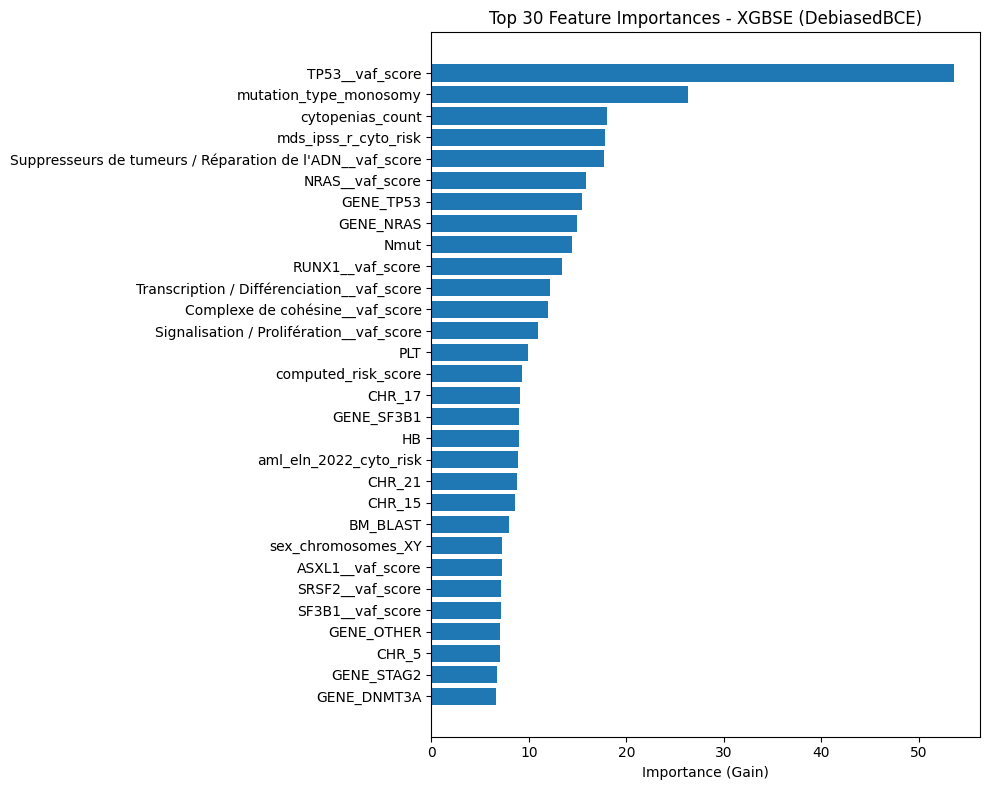

In [ ]:
# Check if model exists and has the booster attribute
if 'model' in locals() and hasattr(model, 'bst'):
    print("\n--- Feature Importances (XGBSE - Last Fold) ---")
    
    # Extract feature importances (Gain)
    # The booster stores feature importance
    importance = model.bst.get_score(importance_type='gain')
    
    # Convert to DataFrame
    df_imp = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
    df_imp = df_imp.sort_values('Importance', ascending=False)
    
    # Display top 30
    nb_features = 30
    print(df_imp.head(nb_features))
    
    # Plot
    plt.figure(figsize=(10, 8))
    # Invert for barh to show top at top
    subset = df_imp.head(nb_features).iloc[::-1]
    plt.barh(subset['Feature'], subset['Importance'])
    plt.xlabel('Importance (Gain)')
    plt.title(f'Top {nb_features} Feature Importances - XGBSE (DebiasedBCE)')
    plt.tight_layout()
    plt.show()
else:
    print("Model not found or does not expose 'bst' attribute.")

In [ ]:
from xgbse import XGBSEStackedWeibull

# X = ton dataframe (features)
# y = array structuré du type:
# y = np.array([(event, time), ...],
#              dtype=[("event", bool), ("time", float)])

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_train_scores = []
xgb_val_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    # -----------------------------
    # 🔥 Modèle recommandé (champion Kaggle-like)
    # -----------------------------
    model = XGBSEStackedWeibull()

    # Fit
    model.fit(
        X=X_tr,
        y=y_tr,
        early_stopping_rounds=50,
        validation_data=[X_val, y_val]
    )

    # -----------------------------
    # Prédiction → risque (plus haut = plus à risque)
    # -----------------------------
    risk_train = model.predict(X_tr)
    risk_val = model.predict(X_val)

    # -----------------------------
    # C-index (identique à ton setup)
    # -----------------------------
    c_tr = concordance_index(y_tr, risk_train)
    c_val = concordance_index(y_val, risk_val)s

    print(f"  XGBSE -> train C-index: {c_tr:.4f} | val: {c_val:.4f}")

    xgb_train_scores.append(c_tr)
    xgb_val_scores.append(c_val)

print("\n=== Résumé XGBSE (DebiasedBCE) ===")
print(f"Train C-index moyen: {np.mean(xgb_train_scores):.4f} ± {np.std(xgb_train_scores):.4f}")
print(f"Val   C-index moyen: {np.mean(xgb_val_scores):.4f} ± {np.std(xgb_val_scores):.4f}")



Fold 1/5
  XGBSE -> train C-index: 0.8092 | val: 0.7291

Fold 2/5


KeyboardInterrupt: 

In [99]:
from sklearn.model_selection import train_test_split

# Nettoyage des colonnes dupliquées dans X_eval (comme fait pour X)
if X_eval.columns.duplicated().any():
    print(f"Removing duplicate columns from X_eval: {X_eval.columns[X_eval.columns.duplicated()].tolist()}")
    X_eval = X_eval.loc[:, ~X_eval.columns.duplicated()]

model = XGBSEStackedWeibull()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, early_stopping_rounds=50, validation_data=[X_val, y_val])
score = concordance_index(y_val, model.predict(X_val))
print(f"Validation C-index: {score:.4f}")
prediction_on_test_set = model.predict(X_eval)

Validation C-index: 0.7256


In [95]:
prediction_on_test_set

,1.0,2.0,3.0,5.0,6.0,7.0,9.0,10.0,12.0,13.0,14.0,16.0
0,0.555831,0.270407,0.123810,0.023084,0.009543,0.003854,0.000593,0.000227,0.000032,0.000012,0.000004,5.342097e-07
1,0.571465,0.287537,0.136528,0.027517,0.011850,0.004991,0.000837,0.000334,0.000051,0.000020,0.000007,1.040618e-06
2,0.899869,0.788781,0.683060,0.500255,0.424347,0.358260,0.252307,0.210632,0.145478,0.120411,0.099416,6.730617e-02
3,0.555226,0.269756,0.123336,0.022926,0.009462,0.003815,0.000585,0.000223,0.000031,0.000011,0.000004,5.204160e-07
4,0.521145,0.234465,0.098667,0.015356,0.005774,0.002116,0.000266,0.000092,0.000010,0.000003,0.000001,1.138155e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,0.845219,0.685804,0.546087,0.333815,0.257457,0.197124,0.113438,0.085364,0.047673,0.035404,0.026192,1.418521e-02
1189,0.610974,0.333439,0.172846,0.042043,0.019982,0.009311,0.001923,0.000855,0.000163,0.000070,0.000030,5.207589e-06
1190,0.873345,0.737774,0.613753,0.412251,0.334122,0.269190,0.172100,0.136705,0.085281,0.067012,0.052493,3.193353e-02
1191,0.793579,0.595936,0.436314,0.222652,0.156162,0.108460,0.051033,0.034630,0.015652,0.010434,0.006921,3.001679e-03


In [94]:
submission = pd.Series(prediction_on_test_set, index=df_eval['ID'], name='OS_YEARS')

ValueError: Data must be 1-dimensional, got ndarray of shape (1193, 12) instead

In [ ]:
submission.to_csv('submission.csv', header=True)

In [ ]:
from xgbse import XGBSEKaplanNeighbors
from xgbse.metrics import concordance_index
from sklearn.model_selection import KFold
import numpy as np

# X = ton dataframe (features)
# y = array structuré du type:
# y = np.array([(event, time), ...],
#              dtype=[("event", bool), ("time", float)])

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_train_scores = []
xgb_val_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    # -----------------------------
    # 🔥 Modèle recommandé (champion Kaggle-like)
    # -----------------------------
    model = XGBSEKaplanNeighbors()

    # Fit
    model.fit(
        X=X_tr,
        y=y_tr,
        early_stopping_rounds=50,
        validation_data=[X_val, y_val]
    )

    # -----------------------------
    # Prédiction → risque (plus haut = plus à risque)
    # -----------------------------
    risk_train = model.predict(X_tr)
    risk_val = model.predict(X_val)

    # -----------------------------
    # C-index (identique à ton setup)
    # -----------------------------
    c_tr = concordance_index(y_tr, risk_train)
    c_val = concordance_index(y_val, risk_val)

    print(f"  XGBSE -> train C-index: {c_tr:.4f} | val: {c_val:.4f}")

    xgb_train_scores.append(c_tr)
    xgb_val_scores.append(c_val)

print("\n=== Résumé XGBSE (DebiasedBCE) ===")
print(f"Train C-index moyen: {np.mean(xgb_train_scores):.4f} ± {np.std(xgb_train_scores):.4f}")
print(f"Val   C-index moyen: {np.mean(xgb_val_scores):.4f} ± {np.std(xgb_val_scores):.4f}")



Fold 1/5


c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\xgbse\non_parametric.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.DataFrame(C_exp).fillna(method="bfill").fillna(method="ffill").values
c:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\.venv\Lib\site-packages\xgbse\non_parametric.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.DataFrame(C_exp).fillna(method="bfill").fillna(method="ffill").values


KeyboardInterrupt: 

In [ ]:
# from xgbse import XGBSEBootstrapEstimator
# # Correct import for get_time_bins
# from xgbse.non_parametric import get_time_bins
# # Ensure X has a unique index
# X = X.reset_index(drop=True)

# n_splits = 5
# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# xgb_train_scores = []
# xgb_val_scores = []

# for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
#     print(f"\nFold {fold}/{n_splits}")

#     X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_tr, y_val = y[train_idx], y[val_idx]

#     # Compute consistent time bins for all bootstrap models to avoid alignment errors
#     # get_time_bins returns the bins edges
#     time_bins = get_time_bins(y_tr['time'], y_tr['event'])

#     # -----------------------------
#     # 🔥 Modèle recommandé (champion Kaggle-like)
#     # -----------------------------
#     # Using 20 estimators for speed in this example, increase for better performance
#     model = XGBSEBootstrapEstimator(base_estimator=XGBSEDebiasedBCE(), n_estimators=20)

#     # Fit
#     model.fit(
#         X=X_tr,
#         y=y_tr,
#         early_stopping_rounds=50,
#         validation_data=[X_val, y_val],
#         time_bins=time_bins
#     )

#     # -----------------------------
#     # Prédiction → risque (plus haut = plus à risque)
#     # -----------------------------
#     risk_train = model.predict(X_tr)
#     risk_val = model.predict(X_val)

#     # -----------------------------
#     # C-index (identique à ton setup)
#     # -----------------------------
#     c_tr = concordance_index(y_tr, risk_train)
#     c_val = concordance_index(y_val, risk_val)

#     print(f"  XGBSE -> train C-index: {c_tr:.4f} | val: {c_val:.4f}")

#     xgb_train_scores.append(c_tr)
#     xgb_val_scores.append(c_val)

# print("\n=== Résumé XGBSE (BootstrapEstimator) ===")
# print(f"Train C-index moyen: {np.mean(xgb_train_scores):.4f} ± {np.std(xgb_train_scores):.4f}")
# print(f"Val   C-index moyen: {np.mean(xgb_val_scores):.4f} ± {np.std(xgb_val_scores):.4f}")